In [1]:
# For another day...
# Maybe try decision tree regression...https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
# Note to self: good ol' stackoverflow link: https://stackoverflow.com/questions/51972637/nonlinear-regression-with-python-whats-a-simple-method-to-fit-this-data-bette

# 1. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn 

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# 2. Define Functions

## 2.1 Data Functions

In [3]:
def prepare_data(data_path_A, data_path_B, test_size=0.3, random_state=42):
    # Extract and show data
    data_A = pd.read_csv(data_path_A)
    data_B = pd.read_csv(data_path_B)
    print("Our simulation data for the Black or A Group:")
    print(data_A)
    print("Our simulation data for the White or B Group:")
    print(data_B)
    
    # Transform data from pandas df --> numpy array and return
    scores_A = data_A['score'].to_numpy()
    probs_A = data_A['repay_probability'].to_numpy()
    scores_B = data_B['score'].to_numpy()
    probs_B = data_B['repay_probability'].to_numpy()
    return scores_A, probs_A, scores_B, probs_B

def split_data(scores, probabilities):
    x = scores.reshape(-1,1)
    y = probabilities
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test 

## 2.2 Regression Functions

In [4]:
def run_svr(X_train, y_train, X_test, y_test, kernel, C, epsilon):
    regr = make_pipeline(StandardScaler(), SVR(kernel=kernel, C=C, epsilon=epsilon))
    regr.fit(X_train, y_train)
    pred_regr = regr.predict(X_test).reshape(-1,1)
    coeff_deter = regr.score(pred_regr, y_test)
    print(coeff_deter)
    return regr

def visualize_svr(regr, X_test, y_test, title):
    print('Note: magenta is true, green is predicted')
    plt.scatter(X_test, y_test, color = 'magenta')
    plt.scatter(X_test, regr.predict(X_test), color = 'green')
    plt.title(title)
    plt.xlabel('Credit Score')
    plt.ylabel('Probability')
    plt.show()
    return
    
# Need mglearn for visualize_knr so run the below in it's own cell in case
#! pip3 install mglearn
def visualize_knr(n_neighbors, X_train, y_train, X_test, y_test, reg):
    fig, ax = plt.subplots()
    #fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    #line = np.linspace(-3, 3, 1000).reshape(-1, 1)
    #ax.plot(line, reg.predict(line))
    ax.plot(X_test, reg.predict(X_test),'o', color = 'green')
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title('{} neighbors\n test score: {:.2f}'.format(n_neighbors,    
              reg.score(reg.predict(X_test).reshape(-1, 1), y_test)))
    ax.set_xlabel("Credit Score")
    ax.set_ylabel("Repay Probability")
    ax.legend(["Model predictions", "Training data/target","Test data/target"], loc="best")
    return

def run_knr(X_train, y_train, X_test, y_test, n_neighbors):
    neigh = KNeighborsRegressor(n_neighbors=20)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test).reshape(-1,1)
    print('The coefficient of determination: ', neigh.score(y_pred, y_test))
    visualize_knr(n_neighbors, X_train, y_train, X_test, y_test, neigh)
    return neigh

# 3. Simulated Dataset with hundredth decimal places (for both scores and probabilities)

## 3.1 Set up data

In [5]:
scores_A, probs_A, scores_B, probs_B = prepare_data(data_path_A='/home/mackenzie/git_repositories/delayedimpact/data/simulated_data/rounded_both_hundredDec/simData_2dec_groupA_black.csv', 
                                                    data_path_B='/home/mackenzie/git_repositories/delayedimpact/data/simulated_data/rounded_both_hundredDec/simData_2dec_groupB_white.csv', 
                                                    test_size=0.3, 
                                                    random_state=42 
                                                   ) 
X_train_A, X_test_A, y_train_A, y_test_A = split_data(scores_A, probs_A)
X_train_B, X_test_B, y_train_B, y_test_B = split_data(scores_B, probs_B)

Our simulation data for the Black or A Group:
      score  repay_probability
0    311.90               0.77
1    311.90               0.77
2    311.90               0.77
3    311.90               0.77
4    323.81               1.20
..      ...                ...
115  772.15              95.23
116  778.48              95.03
117  797.47              96.27
118  806.14              96.90
119  814.91              97.33

[120 rows x 2 columns]
Our simulation data for the White or B Group:
      score  repay_probability
0    300.00               1.46
1    311.90               2.05
2    311.90               2.05
3    323.81               2.64
4    323.81               2.64
..      ...                ...
875  836.84              99.02
876  841.23              99.05
877  841.23              99.05
878  841.23              99.05
879  845.61              99.07

[880 rows x 2 columns]


## 3.2 Non-Linear Regression Results

### 3.2.1 Support Vector Regression from sklearn

Support Vector Regression from sklearn with different kernels <br /> 
kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’ <br /> 
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html <br /> 
Reference: https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d <br /> 
From second ref above: most important SVR parameter is Kernel type  <br /> 
It can be linear, polynomial or gaussian SVR...non-linear condition...can select polynomial or gaussian

#### 3.2.1.1 SVR RBF Kernel Results

In [6]:
# TODO: try other epsilon and C (regularization parameter) values?
# the regularization parameter is essentially how much you want to avoid misclassifying each training example)

Run SVR with RBF Kernel for Group A:
-0.02559233985925613
Note: magenta is true, green is predicted


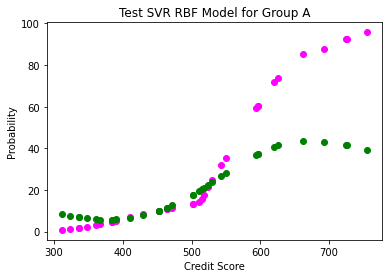

Run SVR with RBF Kernel for Group B:
-0.4305603445006858
Note: magenta is true, green is predicted


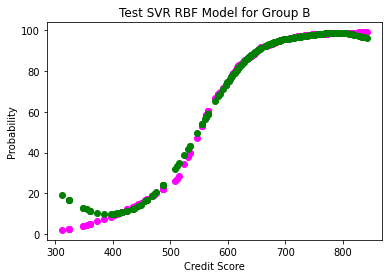

In [7]:
print("Run SVR with RBF Kernel for Group A:")
svr_rbf_A = run_svr(X_train_A, y_train_A, X_test_A, y_test_A, kernel='rbf', C=1.0, epsilon=0.3)
visualize_svr(svr_rbf_A, X_test_A, y_test_A, 'Test SVR RBF Model for Group A')

print("Run SVR with RBF Kernel for Group B:")
svr_rbf_B = run_svr(X_train_B, y_train_B, X_test_B, y_test_B, kernel='rbf', C=1.0, epsilon=0.3)
visualize_svr(svr_rbf_B, X_test_B, y_test_B, 'Test SVR RBF Model for Group B')

#### 3.2.1.2 SVR Poly Kernel

In [8]:
# TODO: try other epsilon and C (regularization parameter) values?
# the regularization parameter is essentially how much you want to avoid misclassifying each training example)

Run SVR with Poly Kernel for Group A:
-182.8628496168083
Note: magenta is true, green is predicted


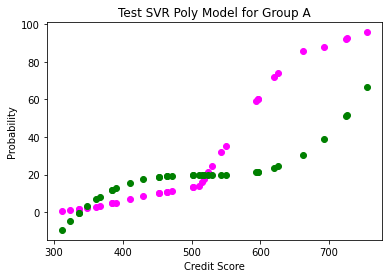

Run SVR with Poly Kernel for Group B:
-403.01304631557355
Note: magenta is true, green is predicted


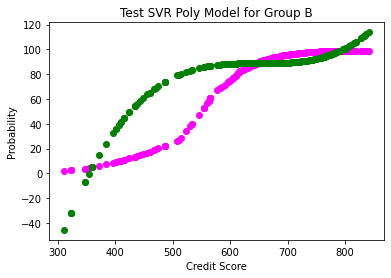

In [9]:
print("Run SVR with Poly Kernel for Group A:")
svr_poly_A = run_svr(X_train_A, y_train_A, X_test_A, y_test_A, kernel='poly', C=1.0, epsilon=0.3)
visualize_svr(svr_poly_A, X_test_A, y_test_A, 'Test SVR Poly Model for Group A')

print("Run SVR with Poly Kernel for Group B:")
svr_poly_B = run_svr(X_train_B, y_train_B, X_test_B, y_test_B, kernel='poly', C=1.0, epsilon=0.3)
visualize_svr(svr_poly_B, X_test_B, y_test_B, 'Test SVR Poly Model for Group B')

#### 3.2.1.3 SVR Sigmoid Kernel Results

Run SVR with Sigmoid Kernel for Group A:
-1.5226086119613211
Note: magenta is true, green is predicted


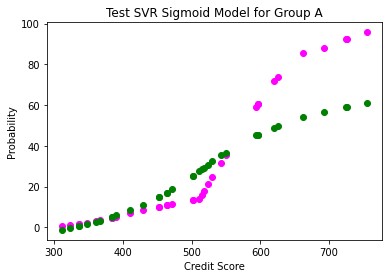

Run SVR with Sigmoid Kernel for Group B:
-2.085622576775305
Note: magenta is true, green is predicted


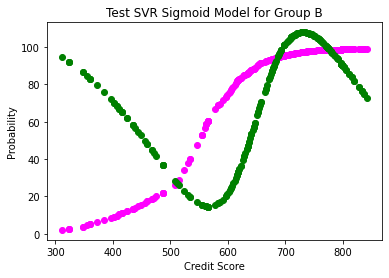

In [10]:
print("Run SVR with Sigmoid Kernel for Group A:")
svr_sig_A = run_svr(X_train_A, y_train_A, X_test_A, y_test_A, kernel='sigmoid', C=1.0, epsilon=0.3)
visualize_svr(svr_sig_A, X_test_A, y_test_A, 'Test SVR Sigmoid Model for Group A')

print("Run SVR with Sigmoid Kernel for Group B:")
svr_sig_B = run_svr(X_train_B, y_train_B, X_test_B, y_test_B, kernel='sigmoid', C=1.0, epsilon=0.3)
visualize_svr(svr_sig_B, X_test_B, y_test_B, 'Test SVR Sigmoid Model for Group B')

### 3.2.2 KNeighbors Regressor from Scikit-Learn Results

Run KNeighbors Regressor for Group A:
The coefficient of determination:  -0.6974269498813401
Run KNeighbors Regressor for Group B:
The coefficient of determination:  -5.618664359981582


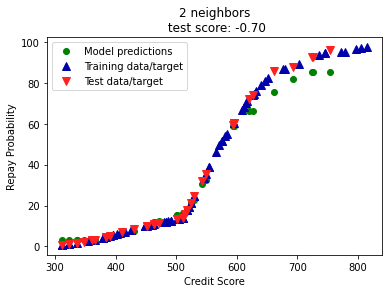

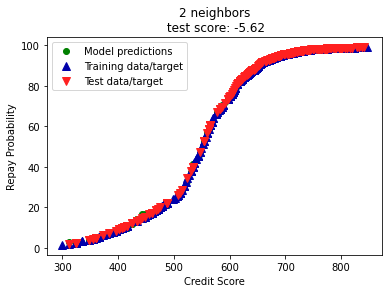

In [11]:
print("Run KNeighbors Regressor for Group A:")
neigh_regr = run_knr(X_train_A, y_train_A, X_test_A, y_test_A, n_neighbors=2)
print("Run KNeighbors Regressor for Group B:")
neigh_regr = run_knr(X_train_B, y_train_B, X_test_B, y_test_B, n_neighbors=2)

## 3.3 Linear Regression

In [12]:

# NOTE: below might not work because data isn't exactly linear...

# Note: much of the linear regression code is adapted from the below link
# Reference: https://realpython.com/linear-regression-in-python/

'''
def run_linear_regression(x_arr, y_arr):
    # data prep
    x = x_arr.reshape(-1,1)
    y = y_arr
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
    
    # train model
    model = LinearRegression().fit(x_train, y_train)

    # analyze regression model on training set
    # NOTE: the intercept, b0 value or coefficient, tells us what the regression predicts if the x is zero
    #       the slope, b1 value, tells us how the predicted response rises/increases when x is increased by 1
    # QUESTION: not sure if the input for score here should be our train and test x and y values? or our test values?
    r_sq = model.score(x_train, y_train)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope/coef:', model.coef_)
    
    # get predictions
    y_pred = model.predict(x_test)
    print('predicted response:', y_pred, sep='\n')
    
    return model, y_test, y_pred

# NOTE: this function came from the Naomi Fridman's answer here 
# Reference: https://stackoverflow.com/questions/26319259/how-to-get-a-regression-summary-in-python-scikit-like-r-does
from sklearn import metrics

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

# Run linear regression on Group A -- Black

model_A, y_test_A, y_pred_A = run_linear_regression(samples_A, samples_A_probs)

# Analysis on Group A linear regression predictions
# NOTE: can't get regression results because some predicted values are negative...
regression_results(y_test_A, y_pred_A)

# Run linear regression on Group B -- White

model_B, y_test_B, y_pred_B = run_linear_regression(samples_B, samples_B_probs)

# Analysis on Group B linear regression predictions
# NOTE: can't get regression results because some predicted values are negative...
regression_results(y_test_B, y_pred_B)
'''

"\ndef run_linear_regression(x_arr, y_arr):\n    # data prep\n    x = x_arr.reshape(-1,1)\n    y = y_arr\n    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)\n    \n    # train model\n    model = LinearRegression().fit(x_train, y_train)\n\n    # analyze regression model on training set\n    # NOTE: the intercept, b0 value or coefficient, tells us what the regression predicts if the x is zero\n    #       the slope, b1 value, tells us how the predicted response rises/increases when x is increased by 1\n    # QUESTION: not sure if the input for score here should be our train and test x and y values? or our test values?\n    r_sq = model.score(x_train, y_train)\n    print('coefficient of determination:', r_sq)\n    print('intercept:', model.intercept_)\n    print('slope/coef:', model.coef_)\n    \n    # get predictions\n    y_pred = model.predict(x_test)\n    print('predicted response:', y_pred, sep='\n')\n    \n    return model, y_test, y_pred\n

# 4. Simulated Dataset with hundredth decimal places for probs and no decimal for scores

## 4.1 Set up data

In [13]:
scores_A, probs_A, scores_B, probs_B = prepare_data(data_path_A='/home/mackenzie/git_repositories/delayedimpact/data/simulated_data/rounded_prob2dec_score0dec/simData_2decProbs_0decScores_groupA_black.csv', 
                                                    data_path_B='/home/mackenzie/git_repositories/delayedimpact/data/simulated_data/rounded_prob2dec_score0dec/simData_2decProbs_0decScores_groupB_white.csv', 
                                                    test_size=0.3, 
                                                    random_state=42 
                                                   ) 
X_train_A, X_test_A, y_train_A, y_test_A = split_data(scores_A, probs_A)
X_train_B, X_test_B, y_train_B, y_test_B = split_data(scores_B, probs_B)

Our simulation data for the Black or A Group:
     score  repay_probability
0    312.0               0.77
1    324.0               1.20
2    324.0               1.20
3    324.0               1.20
4    324.0               1.20
..     ...                ...
115  744.0              94.57
116  778.0              95.03
117  782.0              94.93
118  797.0              96.27
119  806.0              96.90

[120 rows x 2 columns]
Our simulation data for the White or B Group:
     score  repay_probability
0    300.0               1.46
1    312.0               2.05
2    324.0               2.64
3    324.0               2.64
4    324.0               2.64
..     ...                ...
875  832.0              98.99
876  837.0              99.02
877  841.0              99.05
878  841.0              99.05
879  850.0              99.10

[880 rows x 2 columns]


## 4.2 Non-Linear Regression Results

### 4.2.1 Support Vector Regression from sklearn

Support Vector Regression from sklearn with different kernels <br /> 
kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’ <br /> 
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html <br /> 
Reference: https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d <br /> 
From second ref above: most important SVR parameter is Kernel type  <br /> 
It can be linear, polynomial or gaussian SVR...non-linear condition...can select polynomial or gaussian

#### 3.2.1.1 SVR RBF Kernel Results

In [14]:
# TODO: try other epsilon and C (regularization parameter) values?
# the regularization parameter is essentially how much you want to avoid misclassifying each training example)

Run SVR with RBF Kernel for Group A:
-0.019141820700072643
Note: magenta is true, green is predicted


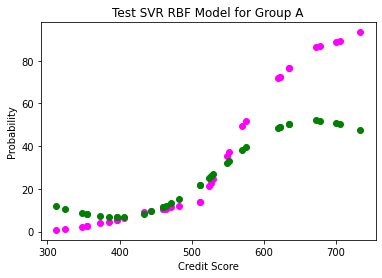

Run SVR with RBF Kernel for Group B:
-0.45004262190447886
Note: magenta is true, green is predicted


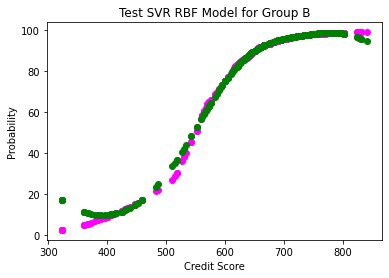

In [15]:
print("Run SVR with RBF Kernel for Group A:")
svr_rbf_A = run_svr(X_train_A, y_train_A, X_test_A, y_test_A, kernel='rbf', C=1.0, epsilon=0.3)
visualize_svr(svr_rbf_A, X_test_A, y_test_A, 'Test SVR RBF Model for Group A')

print("Run SVR with RBF Kernel for Group B:")
svr_rbf_B = run_svr(X_train_B, y_train_B, X_test_B, y_test_B, kernel='rbf', C=1.0, epsilon=0.3)
visualize_svr(svr_rbf_B, X_test_B, y_test_B, 'Test SVR RBF Model for Group B')

#### 4.2.1.2 SVR Poly Kernel

In [16]:
# TODO: try other epsilon and C (regularization parameter) values?
# the regularization parameter is essentially how much you want to avoid misclassifying each training example)

Run SVR with Poly Kernel for Group A:
-236.84183339393113
Note: magenta is true, green is predicted


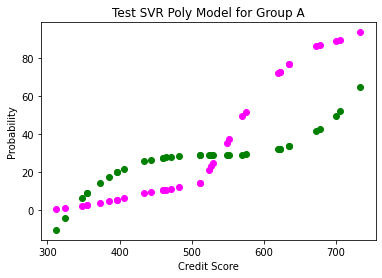

Run SVR with Poly Kernel for Group B:
-534.0267490927471
Note: magenta is true, green is predicted


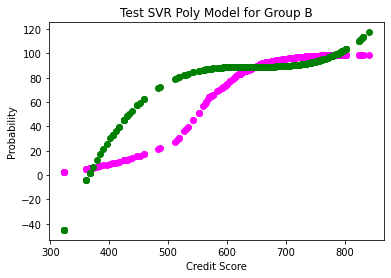

In [17]:
print("Run SVR with Poly Kernel for Group A:")
svr_poly_A = run_svr(X_train_A, y_train_A, X_test_A, y_test_A, kernel='poly', C=1.0, epsilon=0.3)
visualize_svr(svr_poly_A, X_test_A, y_test_A, 'Test SVR Poly Model for Group A')

print("Run SVR with Poly Kernel for Group B:")
svr_poly_B = run_svr(X_train_B, y_train_B, X_test_B, y_test_B, kernel='poly', C=1.0, epsilon=0.3)
visualize_svr(svr_poly_B, X_test_B, y_test_B, 'Test SVR Poly Model for Group B')

#### 4.2.1.3 SVR Sigmoid Kernel Results

Run SVR with Sigmoid Kernel for Group A:
-1.6780291308093207
Note: magenta is true, green is predicted


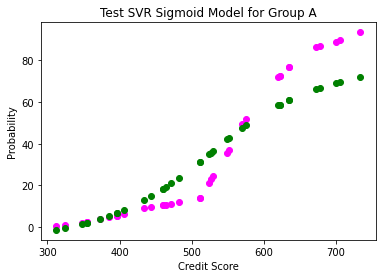

Run SVR with Sigmoid Kernel for Group B:
-4.618223664344341
Note: magenta is true, green is predicted


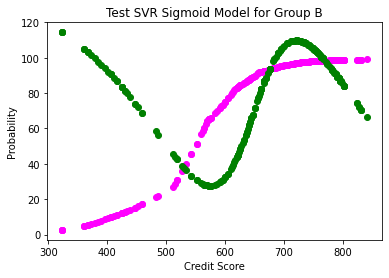

In [18]:
print("Run SVR with Sigmoid Kernel for Group A:")
svr_sig_A = run_svr(X_train_A, y_train_A, X_test_A, y_test_A, kernel='sigmoid', C=1.0, epsilon=0.3)
visualize_svr(svr_sig_A, X_test_A, y_test_A, 'Test SVR Sigmoid Model for Group A')

print("Run SVR with Sigmoid Kernel for Group B:")
svr_sig_B = run_svr(X_train_B, y_train_B, X_test_B, y_test_B, kernel='sigmoid', C=1.0, epsilon=0.3)
visualize_svr(svr_sig_B, X_test_B, y_test_B, 'Test SVR Sigmoid Model for Group B')

### 4.2.2 KNeighbors Regressor from Scikit-Learn Results

Run KNeighbors Regressor for Group A:
The coefficient of determination:  -0.8350826745936912
Run KNeighbors Regressor for Group B:
The coefficient of determination:  -5.864227104266725


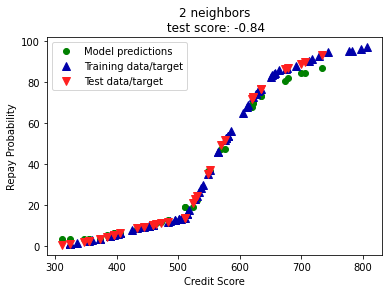

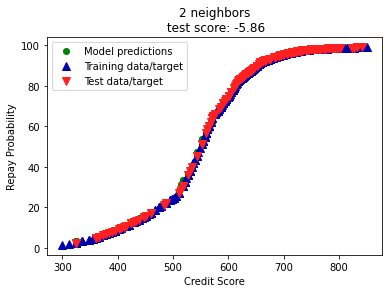

In [19]:
print("Run KNeighbors Regressor for Group A:")
neigh_regr = run_knr(X_train_A, y_train_A, X_test_A, y_test_A, n_neighbors=2)
print("Run KNeighbors Regressor for Group B:")
neigh_regr = run_knr(X_train_B, y_train_B, X_test_B, y_test_B, n_neighbors=2)

## 4.3 Linear Regression

In [20]:

# NOTE: below might not work because data isn't exactly linear...

# Note: much of the linear regression code is adapted from the below link
# Reference: https://realpython.com/linear-regression-in-python/

'''
def run_linear_regression(x_arr, y_arr):
    # data prep
    x = x_arr.reshape(-1,1)
    y = y_arr
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
    
    # train model
    model = LinearRegression().fit(x_train, y_train)

    # analyze regression model on training set
    # NOTE: the intercept, b0 value or coefficient, tells us what the regression predicts if the x is zero
    #       the slope, b1 value, tells us how the predicted response rises/increases when x is increased by 1
    # QUESTION: not sure if the input for score here should be our train and test x and y values? or our test values?
    r_sq = model.score(x_train, y_train)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope/coef:', model.coef_)
    
    # get predictions
    y_pred = model.predict(x_test)
    print('predicted response:', y_pred, sep='\n')
    
    return model, y_test, y_pred

# NOTE: this function came from the Naomi Fridman's answer here 
# Reference: https://stackoverflow.com/questions/26319259/how-to-get-a-regression-summary-in-python-scikit-like-r-does
from sklearn import metrics

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

# Run linear regression on Group A -- Black

model_A, y_test_A, y_pred_A = run_linear_regression(samples_A, samples_A_probs)

# Analysis on Group A linear regression predictions
# NOTE: can't get regression results because some predicted values are negative...
regression_results(y_test_A, y_pred_A)

# Run linear regression on Group B -- White

model_B, y_test_B, y_pred_B = run_linear_regression(samples_B, samples_B_probs)

# Analysis on Group B linear regression predictions
# NOTE: can't get regression results because some predicted values are negative...
regression_results(y_test_B, y_pred_B)
'''

"\ndef run_linear_regression(x_arr, y_arr):\n    # data prep\n    x = x_arr.reshape(-1,1)\n    y = y_arr\n    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)\n    \n    # train model\n    model = LinearRegression().fit(x_train, y_train)\n\n    # analyze regression model on training set\n    # NOTE: the intercept, b0 value or coefficient, tells us what the regression predicts if the x is zero\n    #       the slope, b1 value, tells us how the predicted response rises/increases when x is increased by 1\n    # QUESTION: not sure if the input for score here should be our train and test x and y values? or our test values?\n    r_sq = model.score(x_train, y_train)\n    print('coefficient of determination:', r_sq)\n    print('intercept:', model.intercept_)\n    print('slope/coef:', model.coef_)\n    \n    # get predictions\n    y_pred = model.predict(x_test)\n    print('predicted response:', y_pred, sep='\n')\n    \n    return model, y_test, y_pred\n

# 5. Simulated Data (not-rounded)

## 5.1 Set up data

In [21]:
scores_A, probs_A, scores_B, probs_B = prepare_data(data_path_A='/home/mackenzie/git_repositories/delayedimpact/data/simulated_data/no_rounded_data/simData_groupA_black.csv', 
                                                    data_path_B='/home/mackenzie/git_repositories/delayedimpact/data/simulated_data/no_rounded_data/simData_groupB_white.csv', 
                                                    test_size=0.3, 
                                                    random_state=42 
                                                   ) 
X_train_A, X_test_A, y_train_A, y_test_A = split_data(scores_A, probs_A)
X_train_B, X_test_B, y_train_B, y_test_B = split_data(scores_B, probs_B)

Our simulation data for the Black or A Group:
          score  repay_probability
0    323.809524               1.20
1    323.809524               1.20
2    323.809524               1.20
3    323.809524               1.20
4    347.619048               2.07
..          ...                ...
115  778.481013              95.03
116  784.810127              94.82
117  792.721519              95.63
118  801.754386              96.69
119  810.526316              97.12

[120 rows x 2 columns]
Our simulation data for the White or B Group:
          score  repay_probability
0    311.904762               2.05
1    323.809524               2.64
2    323.809524               2.64
3    323.809524               2.64
4    323.809524               2.64
..          ...                ...
875  836.842105              99.02
876  836.842105              99.02
877  836.842105              99.02
878  836.842105              99.02
879  841.228070              99.05

[880 rows x 2 columns]


## 5.2 Previous svr results achieved below (not great...)

In [22]:
# RBF Results achieved before on not-rounded data

# Group B
#regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))  #-->coeff: -0.36296498276294864
#regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.3))  #-->coeff: -0.3652976042122389
#regr = make_pipeline(StandardScaler(), SVR(C=0.5, epsilon=0.3))  #-->coeff: -0.23835375001776704
# BEST COEFF OF DETER BELOW
#regr = make_pipeline(StandardScaler(), SVR(C=0.1, epsilon=0.3))  #-->coeff: -0.042382992971224054

# Group A
#regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)) #-->coeff_deter: -0.012706644468506667
#regr = make_pipeline(StandardScaler(), SVR(C=0.1, epsilon=0.3))  #-->coeff: -0.2612896481538065
#regr = make_pipeline(StandardScaler(), SVR(C=0.5, epsilon=0.3))  #-->coeff: -0.1093816755100896
# BEST COEFF OF DETER BELOW
#regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.3))  #-->coeff: -0.012641555893034617

In [23]:
# Poly results achieved before on non-rounded data

# Group B
#regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1.0, epsilon=0.2)) #-->coeff: -536.2309036564716
#regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1.0, epsilon=0.3)) #-->coeff: -559.4341930966343
#regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=0.5, epsilon=0.3))  #-->coeff: -474.5324357435279
# BEST COEFF OF DETER BELOW
#regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=0.1, epsilon=0.3))  #-->coeff: -467.13337490366484

# Group A
#regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1.0, epsilon=0.2)) #-->coeff: -156.2427009940815 
#regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1.0, epsilon=0.3)) #-->coeff: -155.97656188927664
#regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=0.5, epsilon=0.3))  #-->coeff: -226.4586785310316
# BEST COEFF OF DETER BELOW
#regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=0.1, epsilon=0.3))  #-->coeff: -128.6310324010967

In [24]:
# Sigmoid SVR results achieved below on not rounded data

# below are for Group B
#regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=1.0, epsilon=0.2)) #-->coeff: -0.41868297133015675
#regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=1.0, epsilon=0.3)) #-->coeff: -0.41868297133015675
#regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=0.1, epsilon=0.3)) #-->coeff: -0.41868297133015675
#regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=0.5, epsilon=0.3))  #-->coeff: -0.41868297133015675

# below are for Group A
#regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=1.0, epsilon=0.2)) #-->coeff: -1.6361109468366029
#regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=1.0, epsilon=0.3)) #-->coeff: -1.6434446411199568
#regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=0.5, epsilon=0.3))  #-->coeff: -1.2341282202386221
# BEST COEFF OF DETER BELOW
#regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=0.1, epsilon=0.3))  #-->coeff: -0.5210342120547167